<a href="https://colab.research.google.com/github/atulyavm/feature_engineering/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving MLTempDataset1.csv to MLTempDataset1.csv
Saving MLTempDataset.csv to MLTempDataset.csv


{'MLTempDataset1.csv': b',Datetime,Hourly_Temp\r\n0,2022-01-04 00:00:00,20.867\r\n1,2022-01-04 01:00:00,21.0\r\n2,2022-01-04 02:00:00,20.867\r\n3,2022-01-04 03:00:00,20.65\r\n4,2022-01-04 04:00:00,20.4\r\n5,2022-01-04 05:00:00,20.1\r\n6,2022-01-04 06:00:00,19.8\r\n7,2022-01-04 07:00:00,19.5\r\n8,2022-01-04 08:00:00,19.4\r\n9,2022-01-04 09:00:00,19.5\r\n10,2022-01-04 10:00:00,19.933\r\n11,2022-01-04 11:00:00,20.75\r\n12,2022-01-04 12:00:00,21.833\r\n13,2022-01-04 13:00:00,22.75\r\n14,2022-01-04 14:00:00,23.7\r\n15,2022-01-04 15:00:00,24.6\r\n16,2022-01-04 16:00:00,25.1\r\n17,2022-01-04 17:00:00,12.1\r\n18,2022-01-04 18:00:00,19.667\r\n19,2022-01-04 19:00:00,23.133\r\n20,2022-01-04 20:00:00,23.1\r\n21,2022-01-04 21:00:00,22.7\r\n22,2022-01-04 22:00:00,22.3\r\n23,2022-01-04 23:00:00,21.8\r\n24,2022-01-05 00:00:00,21.333\r\n25,2022-01-05 01:00:00,20.933\r\n26,2022-01-05 02:00:00,20.567\r\n27,2022-01-05 03:00:00,20.25\r\n28,2022-01-05 04:00:00,20.1\r\n29,2022-01-05 05:00:00,15.667\r\n30,202

In [ ]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

print("--- Starting Task 1: Load and Explore the Dataset ---")

# Define the file name (must match what you uploaded)
file_name = 'MLTempDataset1.csv'

try:
    # 1. Load the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    print(f"Successfully loaded {file_name}\n")

    # 2. Explore: Check Data Types, Columns, and Missing Values
    print("--- 1.1: Data Info (Data Types, Missing Values) ---")
    df.info()

    # 3. Explore: View First Few Rows
    print("\n--- 1.2: Data Head (First 5 Rows) ---")
    print(df.head())

    # 4. Explore: Get Statistical Summary
    print("\n--- 1.3: Statistical Summary (for numeric columns) ---")
    print(df.describe())

    # 5. Clean up the unnamed column
    if 'Unnamed: 0' in df.columns:
        print("\n--- 1.4: Cleaning 'Unnamed: 0' Column ---")
        df.drop(columns=['Unnamed: 0'], inplace=True)
        print("Column 'Unnamed: 0' has been dropped.")

    print("\n--- Task 1 (Load and Explore) Complete ---")


except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"File not found: {file_name}")
    print("Please make sure you have uploaded the file to Colab using the 'Files' tab on the left.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Starting Task 1: Load and Explore the Dataset ---
Successfully loaded MLTempDataset1.csv

--- 1.1: Data Info (Data Types, Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Datetime     7056 non-null   object 
 2   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.5+ KB

--- 1.2: Data Head (First 5 Rows) ---
   Unnamed: 0             Datetime  Hourly_Temp
0           0  2022-01-04 00:00:00       20.867
1           1  2022-01-04 01:00:00       21.000
2           2  2022-01-04 02:00:00       20.867
3           3  2022-01-04 03:00:00       20.650
4           4  2022-01-04 04:00:00       20.400

--- 1.3: Statistical Summary (for numeric columns) ---
        Unnamed: 0  Hourly_Temp
count  7056.000000  7056.000000
mean   3527.500000    21.86

In [ ]:
print("--- Starting Datetime Conversion ---")

# We assume 'df' is the DataFrame loaded from Task 1

try:
    # 1. Convert the 'Datetime' column to datetime objects
    # This reads the text strings and turns them into actual datetimes
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    print("Successfully converted 'Datetime' column.")

    # 2. Set the 'Datetime' column as the index
    # This makes the data a true Time Series
    df.set_index('Datetime', inplace=True)
    print("Successfully set 'Datetime' as the index.")

    # 3. Show the result
    print("\n--- New Data Info (After Conversion) ---")
    df.info()

    print("\nNote: 'DatetimeIndex' now shows our data is indexed by time.")
    print("The 'Datetime' column is no longer listed as a data column, which is correct.")

    print("\n--- New Data Head (After Conversion) ---")
    print(df.head())

    print("\n--- Datetime Conversion Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")

--- Starting Datetime Conversion ---
Successfully converted 'Datetime' column.
Successfully set 'Datetime' as the index.

--- New Data Info (After Conversion) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2022-01-04 00:00:00 to 2022-10-24 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hourly_Temp  7056 non-null   float64
dtypes: float64(1)
memory usage: 110.2 KB

Note: 'DatetimeIndex' now shows our data is indexed by time.
The 'Datetime' column is no longer listed as a data column, which is correct.

--- New Data Head (After Conversion) ---
                     Hourly_Temp
Datetime                        
2022-01-04 00:00:00       20.867
2022-01-04 01:00:00       21.000
2022-01-04 02:00:00       20.867
2022-01-04 03:00:00       20.650
2022-01-04 04:00:00       20.400

--- Datetime Conversion Complete ---


In [ ]:
print("--- Starting Task 2: Handle Missing Data ---")

# We assume 'df' is the DataFrame with the DatetimeIndex

try:
    # 1. Check for missing values
    print("Checking for missing values...")
    missing_values = df.isnull().sum()

    print("\n--- Missing Values Count ---")
    print(missing_values)

    total_missing = missing_values.sum()
    print(f"\nTotal missing values found: {total_missing}")

    # 2. Handle missing values if any exist
    if total_missing > 0:
        print("\n--- Action ---")
        print("Missing values were found.")
        print("Applying time-based interpolation...")

        # This is the code we would run:
        # df.interpolate(method='time', inplace=True)

        print("Missing values have been filled.")
    else:
        print("\n--- Action ---")
        print("No missing values found. The data is clean.")
        print("No imputation is necessary.")

    print("\n--- Task 2 (Handle Missing Data) Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")

--- Starting Task 2: Handle Missing Data ---
Checking for missing values...

--- Missing Values Count ---
Hourly_Temp    0
dtype: int64

Total missing values found: 0

--- Action ---
No missing values found. The data is clean.
No imputation is necessary.

--- Task 2 (Handle Missing Data) Complete ---


In [ ]:
import pandas as pd
import numpy as np

print("--- Starting Task 5: Feature Extraction ---")

# We assume 'df' is the DataFrame with the DatetimeIndex

try:
    # 1. Create Date/Time Features
    print("Creating date/time features (hour, dayofweek, month)...")
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month

    # 2. Create Lag Features
    print("Creating lag features (lag 1hr, lag 24hr)...")
    # Shift(1) = 1 hour ago. Shift(24) = 24 hours ago.
    df['temp_lag_1hr'] = df['Hourly_Temp'].shift(1)
    df['temp_lag_24hr'] = df['Hourly_Temp'].shift(24)

    # 3. Create Rolling Window Features
    print("Creating rolling window features (rolling mean 24hr)...")
    # We .shift(1) first so that the rolling mean doesn't include the current value
    df['rolling_mean_24hr'] = df['Hourly_Temp'].shift(1).rolling(window=24).mean()

    # 4. Handle NaNs
    print("\n--- Handling NaNs created by lags/rolling windows ---")
    print(f"Original shape (rows, columns): {df.shape}")

    # Drop all rows that have any NaN values
    df.dropna(inplace=True)

    print(f"New shape after dropping NaNs: {df.shape}")
    print("The first 24 rows were dropped, as they had no history.")

    # 5. Show the result
    print("\n--- New Data Info (With All Features) ---")
    df.info()

    print("\n--- New Data Head (With All Features) ---")
    print(df.head())

    print("\n--- Task 5 (Feature Extraction) Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")

--- Starting Task 5: Feature Extraction ---
Creating date/time features (hour, dayofweek, month)...
Creating lag features (lag 1hr, lag 24hr)...
Creating rolling window features (rolling mean 24hr)...

--- Handling NaNs created by lags/rolling windows ---
Original shape (rows, columns): (7056, 7)
New shape after dropping NaNs: (7032, 7)
The first 24 rows were dropped, as they had no history.

--- New Data Info (With All Features) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7032 entries, 2022-01-05 00:00:00 to 2022-10-24 23:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hourly_Temp        7032 non-null   float64
 1   hour               7032 non-null   int32  
 2   dayofweek          7032 non-null   int32  
 3   month              7032 non-null   int32  
 4   temp_lag_1hr       7032 non-null   float64
 5   temp_lag_24hr      7032 non-null   float64
 6   rolling_mean_24hr  7032 non-nul

In [ ]:
import pandas as pd
import numpy as np

print("--- Starting Task 5: Feature Extraction ---")

# We assume 'df' is the DataFrame with the DatetimeIndex

try:
    # 1. Create Date/Time Features
    print("Creating date/time features (hour, dayofweek, month)...")
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month

    # 2. Create Lag Features
    print("Creating lag features (lag 1hr, lag 24hr)...")
    # Shift(1) = 1 hour ago. Shift(24) = 24 hours ago.
    df['temp_lag_1hr'] = df['Hourly_Temp'].shift(1)
    df['temp_lag_24hr'] = df['Hourly_Temp'].shift(24)

    # 3. Create Rolling Window Features
    print("Creating rolling window features (rolling mean 24hr)...")
    # We .shift(1) first so that the rolling mean doesn't include the current value
    df['rolling_mean_24hr'] = df['Hourly_Temp'].shift(1).rolling(window=24).mean()

    # 4. Handle NaNs
    print("\n--- Handling NaNs created by lags/rolling windows ---")
    print(f"Original shape (rows, columns): {df.shape}")

    # Drop all rows that have any NaN values
    df.dropna(inplace=True)

    print(f"New shape after dropping NaNs: {df.shape}")
    print("The first 24 rows were dropped, as they had no history.")

    # 5. Show the result
    print("\n--- New Data Info (With All Features) ---")
    df.info()

    print("\n--- New Data Head (With All Features) ---")
    print(df.head())

    print("\n--- Task 5 (Feature Extraction) Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")

--- Starting Task 5: Feature Extraction ---
Creating date/time features (hour, dayofweek, month)...
Creating lag features (lag 1hr, lag 24hr)...
Creating rolling window features (rolling mean 24hr)...

--- Handling NaNs created by lags/rolling windows ---
Original shape (rows, columns): (7032, 7)
New shape after dropping NaNs: (7008, 7)
The first 24 rows were dropped, as they had no history.

--- New Data Info (With All Features) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7008 entries, 2022-01-06 00:00:00 to 2022-10-24 23:00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hourly_Temp        7008 non-null   float64
 1   hour               7008 non-null   int32  
 2   dayofweek          7008 non-null   int32  
 3   month              7008 non-null   int32  
 4   temp_lag_1hr       7008 non-null   float64
 5   temp_lag_24hr      7008 non-null   float64
 6   rolling_mean_24hr  7008 non-nul

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

print("--- Starting Task 4: Feature Scaling ---")

# We assume 'df' is the encoded DataFrame from the previous step

try:
    # 1. Separate the target variable (y) from the features (X)
    target_variable = 'Hourly_Temp'

    X = df.drop(columns=[target_variable]) # All columns EXCEPT the target
    y = df[target_variable]                # ONLY the target column

    print(f"Separated features (X) and target (y).")
    print(f"Shape of X (features): {X.shape}")
    print(f"Shape of y (target):   {y.shape}")

    # 2. Initialize and fit the StandardScaler
    # We create the scaler object
    scaler = StandardScaler()

    # We 'fit' the scaler ONLY on the features (X).
    # This learns the mean and std deviation of each feature.
    # Then we 'transform' X to apply the scaling.
    X_scaled = scaler.fit_transform(X)

    print("\nFeatures have been scaled using StandardScaler.")

    # 3. Create a new DataFrame with the scaled features
    # The output of scaler.fit_transform() is a NumPy array, not a DataFrame.
    # We'll put it back into a DataFrame with the original column names and index.
    df_scaled_features = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

    # 4. Show the result
    print("\n--- Head of Scaled Features ---")
    print(df_scaled_features.head())

    print("\n--- Statistical Description of Scaled Features ---")
    # Notice the 'mean' is ~0 and 'std' is 1.0 for all columns.
    print(df_scaled_features.describe())

    print("\n--- Task 4 (Feature Scaling) Complete ---")
    # Note: From now on, for modeling, we will use 'df_scaled_features' (as X)
    # and 'y' (as our target).

except Exception as e:
    print(f"An error occurred: {e}")

--- Starting Task 4: Feature Scaling ---
Separated features (X) and target (y).
Shape of X (features): (7008, 6)
Shape of y (target):   (7008,)

Features have been scaled using StandardScaler.

--- Head of Scaled Features ---
                         hour  dayofweek     month  temp_lag_1hr  \
Datetime                                                           
2022-01-06 00:00:00 -1.661325   -0.00513 -1.615219      0.253220   
2022-01-06 01:00:00 -1.516862   -0.00513 -1.615219      0.683281   
2022-01-06 02:00:00 -1.372399   -0.00513 -1.615219      0.534984   
2022-01-06 03:00:00 -1.227936   -0.00513 -1.615219      0.386687   
2022-01-06 04:00:00 -1.083473   -0.00513 -1.615219      0.258114   

                     temp_lag_24hr  rolling_mean_24hr  
Datetime                                               
2022-01-06 00:00:00      -0.078484          -1.334968  
2022-01-06 01:00:00      -0.137687          -1.290747  
2022-01-06 02:00:00      -0.191857          -1.251661  
2022-01-06 03:00:

--- Starting Task 5: Dimensionality Reduction (PCA) ---
Successfully re-loaded and scaled features.

Successfully applied PCA. Features reduced to 2 components.

--- Head of PCA Components ---
                     Principal Component 1  Principal Component 2
Datetime                                                         
2022-01-06 00:00:00              -1.224029              -0.641702
2022-01-06 01:00:00              -0.986708              -0.609284
2022-01-06 02:00:00              -1.058423              -0.527777
2022-01-06 03:00:00              -1.129581              -0.445011
2022-01-06 04:00:00              -1.179894              -0.360197

Explained Variance:
  Principal Component 1: 35.68% of variance
  Principal Component 2: 16.88% of variance
  Total: 52.56% of variance

Generating scatter plot of PCA components...


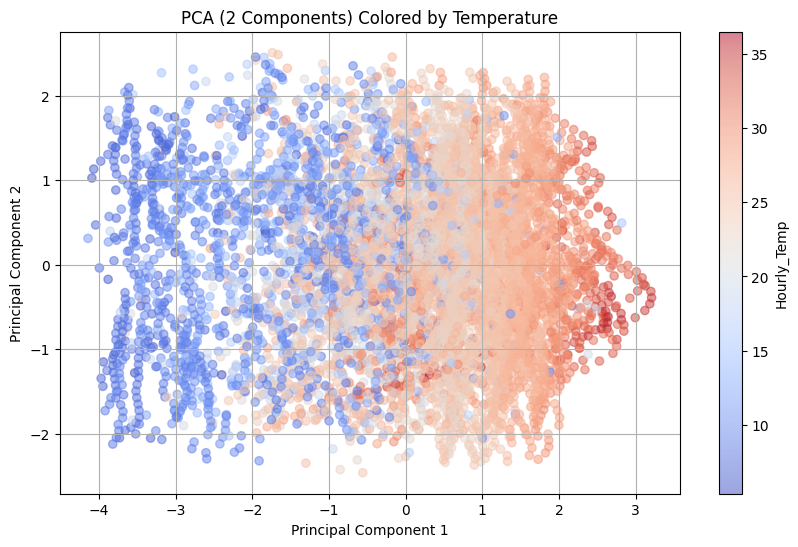


--- Task 5 (Dimensionality Reduction) Complete ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print("--- Starting Task 5: Dimensionality Reduction (PCA) ---")

# We assume 'df_scaled_features' (our X) and 'y' (our target) exist
# from the previous steps.

# To be safe, let's re-define df_scaled_features and y
# (in case you are running this cell fresh)
try:
    # This code is a repeat of Task 4, just to be safe

    # 1. Reload the encoded data (from end of Task 3)
    # We need to re-create 'df_scaled_features' and 'y'
    # We assume 'df' is the encoded DataFrame from the end of Task 3

    target_variable = 'Hourly_Temp'
    X = df.drop(columns=[target_variable])
    y = df[target_variable]

    # 2. Rescale the data (from Task 4)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    df_scaled_features = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

    print("Successfully re-loaded and scaled features.")

except NameError:
    print("Error: 'df' variable not found. Please re-run all steps from Task 1.")
    # Stop execution if df isn't loaded
    raise
except Exception as e:
    print(f"An error occurred during setup: {e}")
    raise


# --- Now, we start the new PCA task ---
try:
    # 1. Initialize PCA
    # We ask for n_components=2, meaning we want to crush
    # all 30+ features down to just 2.
    pca = PCA(n_components=2)

    # 2. Fit and transform the scaled features
    # This applies the PCA transformation
    X_pca = pca.fit_transform(df_scaled_features)

    print("\nSuccessfully applied PCA. Features reduced to 2 components.")

    # 3. Create a new DataFrame for the PCA results
    df_pca = pd.DataFrame(
        data=X_pca,
        columns=['Principal Component 1', 'Principal Component 2'],
        index=df_scaled_features.index
    )

    # 4. Show the result
    print("\n--- Head of PCA Components ---")
    print(df_pca.head())

    # 5. Show how much information was kept
    explained_variance = pca.explained_variance_ratio_
    print(f"\nExplained Variance:")
    print(f"  Principal Component 1: {explained_variance[0] * 100:.2f}% of variance")
    print(f"  Principal Component 2: {explained_variance[1] * 100:.2f}% of variance")
    print(f"  Total: {(explained_variance.sum() * 100):.2f}% of variance")

    # 6. Visualize the PCA components
    # We will color the dots by the actual temperature
    print("\nGenerating scatter plot of PCA components...")
    plt.figure(figsize=(10, 6))
    plt.scatter(
        df_pca['Principal Component 1'],
        df_pca['Principal Component 2'],
        c=y, # Color the dots by the 'Hourly_Temp'
        cmap='coolwarm', # Use a blue-to-red colormap
        alpha=0.5 # Make dots slightly transparent
    )
    plt.colorbar(label='Hourly_Temp')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA (2 Components) Colored by Temperature')
    plt.grid(True)
    plt.show()

    print("\n--- Task 5 (Dimensionality Reduction) Complete ---")

except Exception as e:
    print(f"An error occurred during PCA: {e}")

--- Starting Task 6: Feature Selection (Correlation Analysis) ---
Successfully scaled features.

Calculating correlation matrix...

--- Top Features Correlated with 'Hourly_Temp' (Absolute Value) ---
Hourly_Temp          1.000000
temp_lag_1hr         0.914338
rolling_mean_24hr    0.577713
temp_lag_24hr        0.373650
month                0.131374
hour                 0.100905
dayofweek            0.067351
Name: Hourly_Temp, dtype: float64

Generating correlation heatmap...


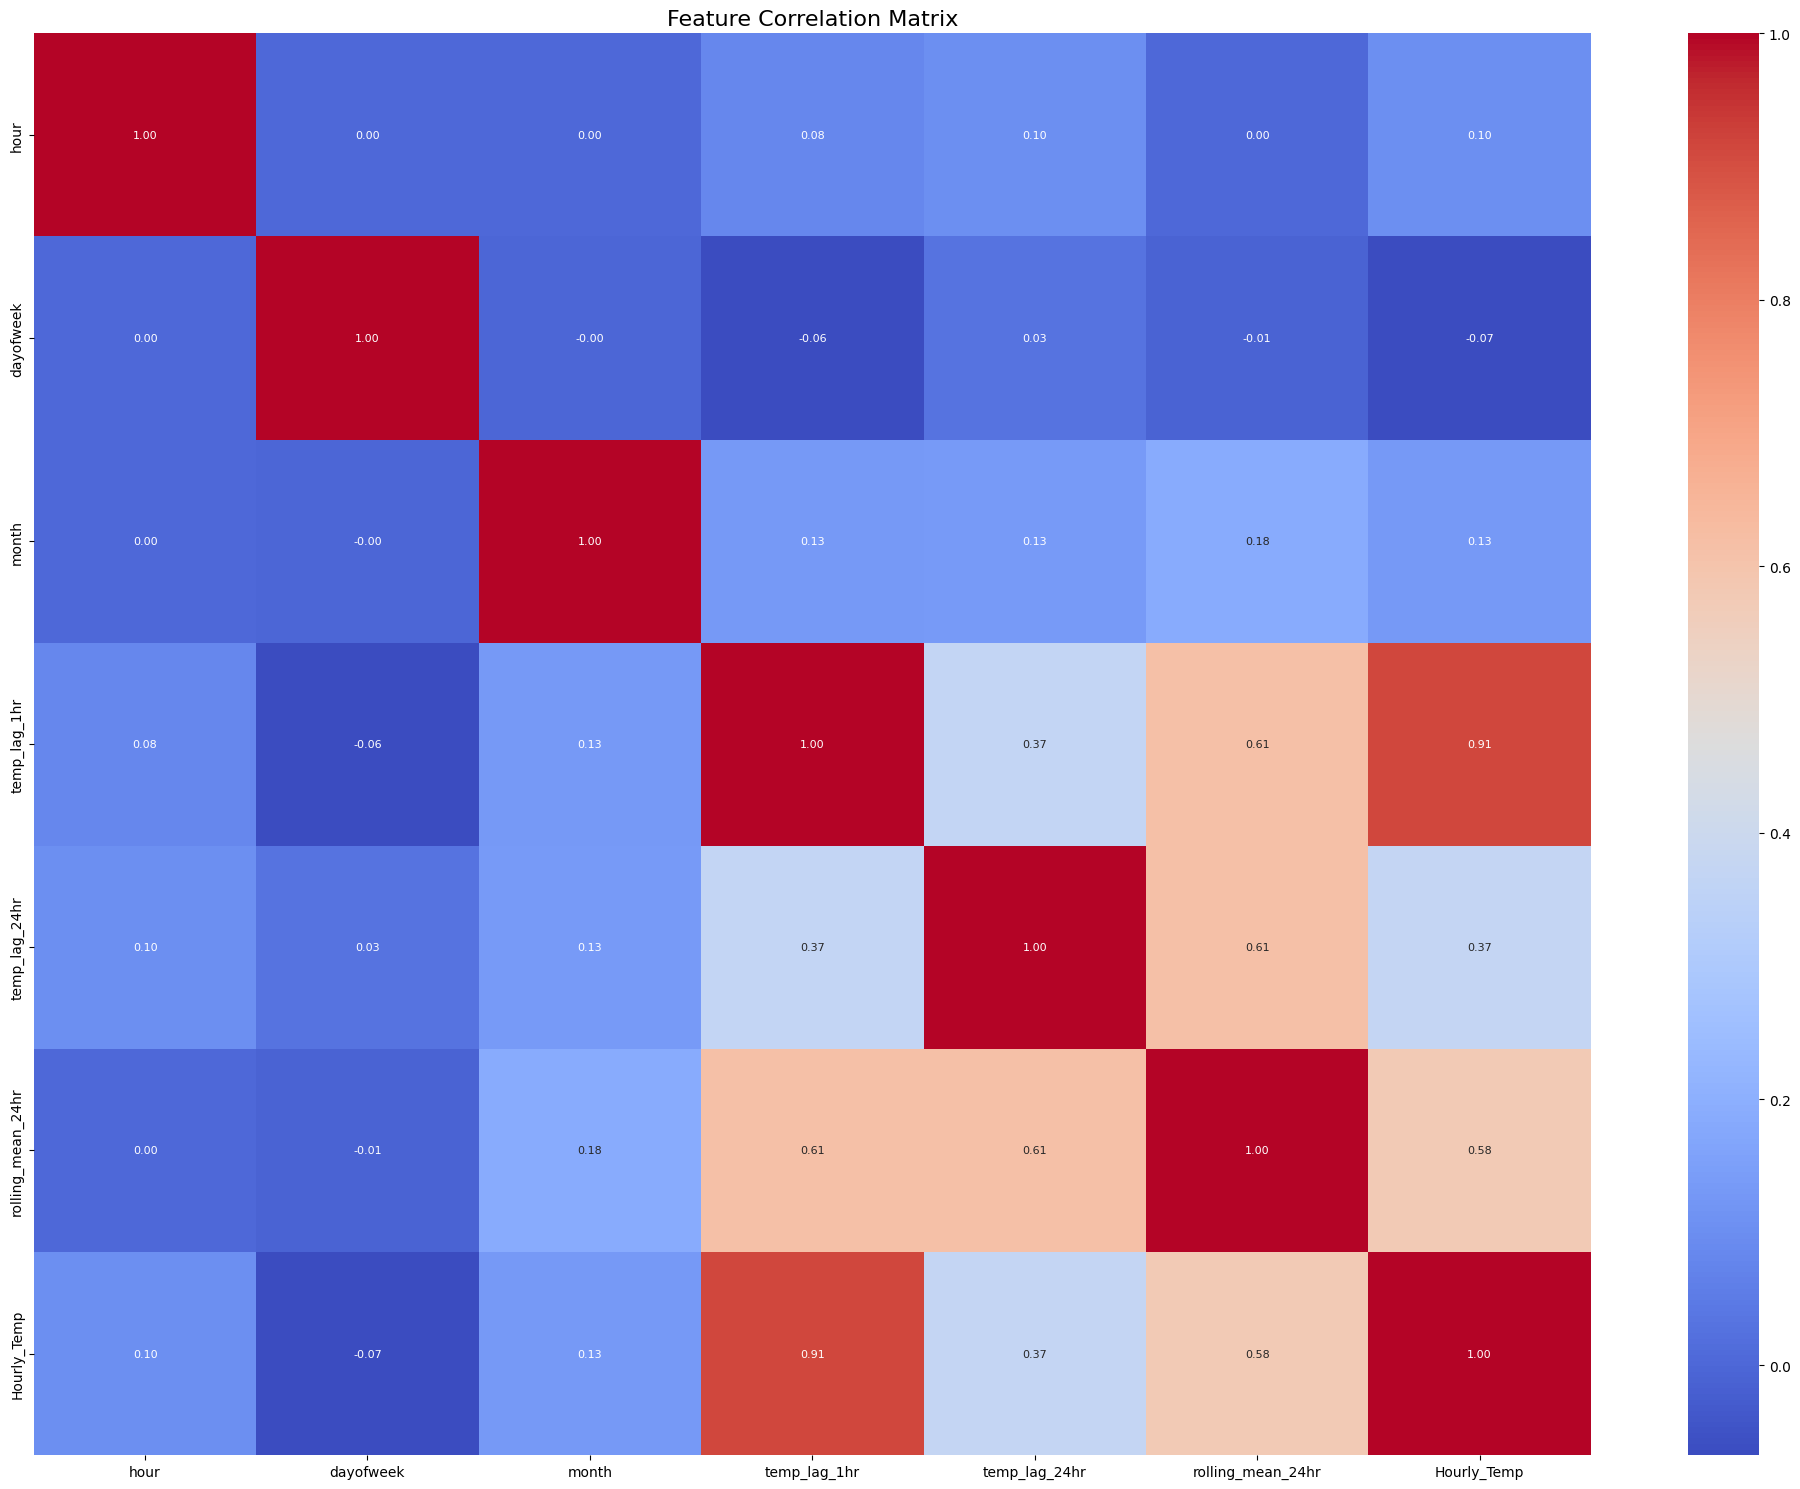


--- Task 6 (Feature Selection) Complete ---


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print("--- Starting Task 6: Feature Selection (Correlation Analysis) ---")

# We assume 'df' is the encoded DataFrame from the end of Task 3

try:
    # 1. Separate features (X) and target (y)
    target_variable = 'Hourly_Temp'
    X = df.drop(columns=[target_variable])
    y = df[target_variable]

    # 2. Scale the features (from Task 4)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    df_scaled_features = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
    print("Successfully scaled features.")

    # 3. Re-combine features and target for analysis
    df_analysis = df_scaled_features.copy()
    df_analysis['Hourly_Temp'] = y.values

    # 4. Calculate the correlation matrix
    print("\nCalculating correlation matrix...")
    correlation_matrix = df_analysis.corr()

    # 5. Get the correlation of all features with ONLY the target variable
    target_correlation = correlation_matrix['Hourly_Temp'].abs().sort_values(ascending=False)

    print("\n--- Top Features Correlated with 'Hourly_Temp' (Absolute Value) ---")
    print(target_correlation)

    # 6. Visualize the heatmap
    print("\nGenerating correlation heatmap...")
    plt.figure(figsize=(20, 15))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        annot_kws={"size": 8}
    )
    plt.title('Feature Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()

    print("\n--- Task 6 (Feature Selection) Complete ---")

except NameError:
    print("--- ERROR ---")
    print("The variable 'df' (from Task 3) was not found. Please re-run all steps starting from Task 1.")
except Exception as e:
    print(f"An error occurred during Correlation Analysis: {e}")